In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
medical_data = pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-medical-data-visualizer/master/medical_examination.csv")

In [3]:
medical_data.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Calculating BMI and adding "overweight" column based on BMI results:

In [4]:
medical_data["overweight"] = medical_data["weight"]/((medical_data["height"]*0.01)**2)
medical_data.loc[medical_data['overweight'] <= 25, 'overweight'] = 0
medical_data.loc[medical_data['overweight'] > 25, 'overweight'] = 1

Normalize the data by making 0 always good and 1 always bad:

In [5]:
medical_data.loc[medical_data["cholesterol"] == 1, "cholesterol"] = 0
medical_data.loc[medical_data["cholesterol"] > 1, "cholesterol"] = 1

In [6]:
medical_data.loc[medical_data["gluc"] == 1, "gluc"] = 0
medical_data.loc[medical_data["gluc"] > 1, "gluc"] = 1

Convert the data into long format:

In [7]:
medical_data_cat = pd.melt(medical_data, id_vars = "cardio", value_vars = ["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])

In [8]:
medical_data_cat.head()

,cardio,variable,value
0,0,active,1.0
1,1,active,1.0
2,1,active,0.0
3,1,active,1.0
4,0,active,0.0


Creating a chart that shows the value counts of the categorical features:

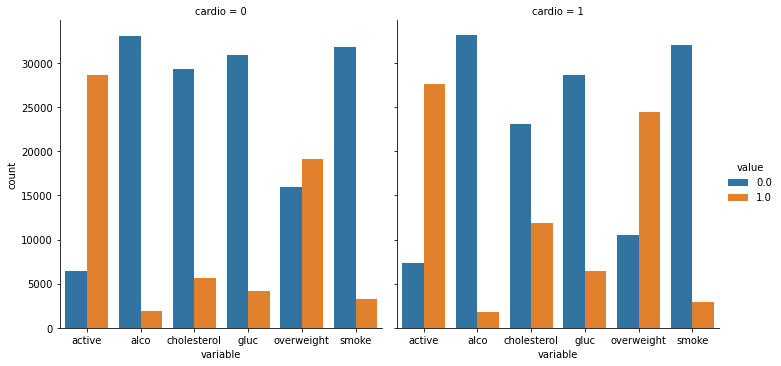

In [9]:
sns.catplot(x='variable',col='cardio',hue='value',kind="count",data=medical_data_cat)

## Graph analysis

Left side graph (cario=0) represents data about patients without cardiovascular diseases, and on the right side (cardio-1) you can see barchart representing data about patients with some of the cardiovascular diseases. 

When you compare these two graphs, you will notice that among patients with cardiovascular diseases there are more patients who were overweight, more patients with higher then normal cholesterol values and less noticable difference, but still present - more patients with cardiovascular disease had higher glucose values then normal, compared to patients without CVD (cardiovascular diseases). 

This seems to suggest that higher then normal cholesterol and glucose values, together with overweight, are risk factors associated with cardio vascular disease. 

In [10]:
medical_data_filtered = medical_data[(medical_data['ap_lo'] <= medical_data['ap_hi']) & (medical_data['height'] >= medical_data['height'].quantile(0.025)) & (medical_data['height'] < medical_data['height'].quantile(0.975)) & (medical_data['weight'] >= medical_data['weight'].quantile(0.025)) & (medical_data['weight'] < medical_data['weight'].quantile(0.975))]

Creating correlation matrix:

<AxesSubplot:>

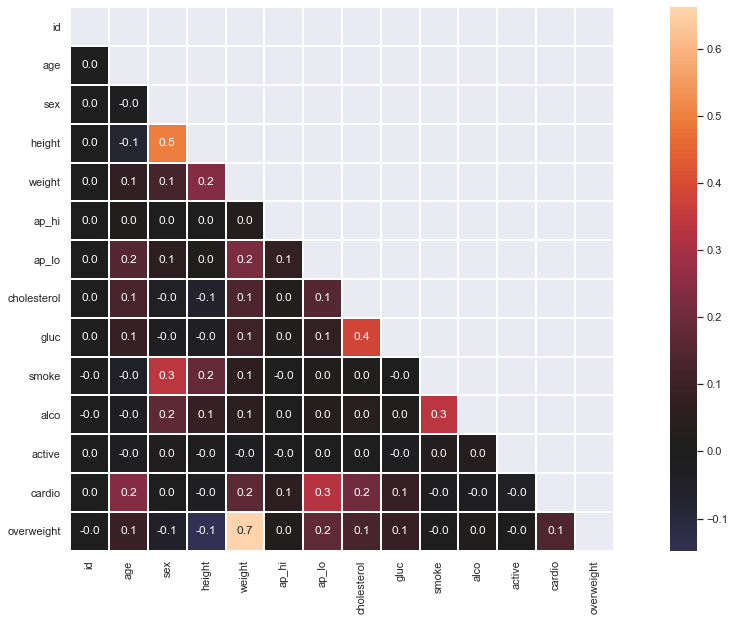

In [11]:
corr = medical_data_filtered.corr()
up_mat = np.triu(corr)
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(corr, center=0.00, annot = True, fmt =".1f", linewidths=1.00, linecolor="white", square=True, mask = up_mat)

Correlation matrix shows that cardiovascular disease is most correlated with values of diastolic blood pressure, then with age and cholesterol values and afterwards with glucose values. 